# Model Building for Training Data

###### Objective: The objective of this project is to understand human emotions using audio clips by converting into text using speech recognition and automate the process to predict the emotions. 

###### Data Description: The data was obtained from various sites and combined together based on the six basic emotions required. The data obtained is text data that contains different texts from different  people and classified according to the emotions. There are sentences in the text data that  are improperly punctuated and poorly framed, with incorrect spellings. The data collected contains 34,623 rows and 2 columns before data cleaning and 2,36,736 words. Real time audio clips containing human speech were collected in order to analyze them.  

###### Model Building: Multinomial Naive Bayes, Random forest classifier, logistic regression for multiclass. 

###### Accuracy and conclusion:The project is based on making a human speech emotion recognition model, where the audio clips are converted into text and then the emotions are correctly predicted. Three models were used to predict the accuracy of the model. Multinomial naive bayes model was used and the accuracy was 76%, Logistic regression model for multiclass gave an accuracy of 78% and random forest classifier gave an accuracy of 80%. So, it can be concluded that random forest classifiers gave the highest accuracy. 




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install scikit-learn

In [ ]:
#importing the training dataset
import io
cleaned = pd.read_csv("combined_cleaned.csv")

In [ ]:
!pip install fsspec

     |████████████████████████████████| 136 kB 5.3 MB/s 


In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
cleaned['Emotion']= label_encoder.fit_transform(cleaned['Emotion'])
 

In [ ]:
cleaned.head()

,Unnamed: 0,Emotion,cleaned text
0,0,4,why
1,1,3,sage act upgrade on my to do list for
2,2,5,on the way to my baby man i hate this really m...
3,3,3,such an eye the true hazel so brilliant regula...
4,4,3,ugh for u babe ako e babe despite mas at ko


In [ ]:
cleaned.head(10)

,Unnamed: 0,Emotion,cleaned text
0,0,4,why
1,1,3,sage act upgrade on my to do list for
2,2,5,on the way to my baby man i hate this really m...
3,3,3,such an eye the true hazel so brilliant regula...
4,4,3,ugh for u babe ako e babe despite mas at ko
5,5,2,an extremely important any minute now
6,6,5,wait to see them if missing them in wasnt pain...
7,7,7,tip stop moment het hele project nu
8,8,7,en dan van
9,9,7,drummer boy van van


In [ ]:
em = []
tx = []
for i in range(cleaned.shape[0]):
    g = str(cleaned.iloc[i]['cleaned text'])
    if(len(g.split())<10):
        continue
    else:
        em.append(cleaned.iloc[i]['Emotion'])
        tx.append(g)
    print(i)

Streaming output truncated to the last 5000 lines.
25817
25819
25825
25826
25827
25829
25830
25832
25833
25837
25838
25839
25842
25844
25846
25847
25849
25853
25854
25855
25856
25858
25859
25860
25861
25862
25863
25865
25866
25867
25871
25873
25874
25875
25876
25878
25879
25880
25881
25882
25885
25886
25887
25895
25897
25898
25899
25900
25907
25908
25910
25911
25912
25913
25914
25916
25917
25920
25921
25923
25924
25926
25927
25928
25929
25931
25935
25937
25938
25939
25940
25941
25943
25944
25945
25946
25949
25951
25952
25955
25956
25959
25960
25963
25964
25968
25969
25970
25971
25972
25974
25975
25977
25980
25981
25983
25984
25985
25987
25989
25990
25993
25994
25995
25997
25998
26000
26002
26003
26004
26005
26009
26010
26011
26012
26014
26015
26016
26018
26019
26021
26022
26023
26024
26026
26031
26032
26033
26037
26038
26039
26041
26042
26043
26045
26048
26049
26051
26052
26053
26054
26058
26062
26068
26072
26073
26074
26075
26076
26077
26078
26080
26081
26085
26086
26087
26088
26091
2

In [ ]:
df = pd.DataFrame({"Emotion": em, "Text": tx})

In [ ]:
df.shape

(19611, 2)

In [ ]:
df.head()

,Emotion,Text
0,5,on the way to my baby man i hate this really m...
1,3,such an eye the true hazel so brilliant regula...
2,3,ugh for u babe ako e babe despite mas at ko
3,5,wait to see them if missing them in wasnt pain...
4,3,for once in his life must have been truly happ...


In [ ]:
df.duplicated().sum()

2286

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,Emotion,Text
0,5,on the way to my baby man i hate this really m...
1,3,such an eye the true hazel so brilliant regula...
2,3,ugh for u babe ako e babe despite mas at ko
3,5,wait to see them if missing them in wasnt pain...
4,3,for once in his life must have been truly happ...


In [ ]:
df.shape

(17325, 2)

## EDA

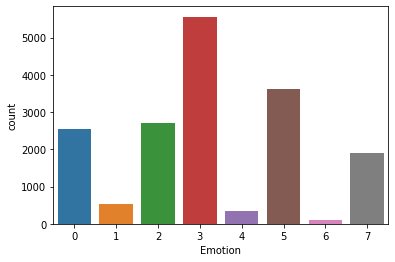

In [ ]:
sns.countplot(df['Emotion'])

In [ ]:
#Selecting the features and the target variable
X = df['Text']
y = df["Emotion"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.3, random_state=43, stratify=y)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer()

# Fits the vectorizer with the training data
tfidf_train = vectorize.fit_transform(X_train)

# Fits the validation data with the vectorizer
tfidf_val = vectorize.transform(X_val)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
tfidf_train, y_train = sm.fit_resample(tfidf_train, y_train.ravel())

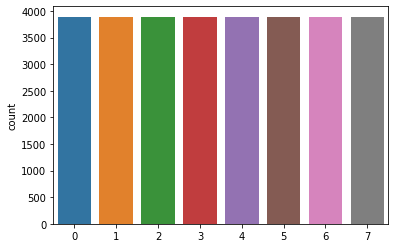

In [ ]:
sns.countplot(y_train)

### MultiNominal Naive Bayes

In [ ]:
# Fitting Multinominal Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(tfidf_train, y_train)

MultinomialNB()

In [ ]:
# testing
y_pred_nb = mnb.predict(tfidf_val)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred_nb)

In [ ]:

print(classification_report(y_val,y_pred_nb))

              precision    recall  f1-score   support

           0       0.46      0.47      0.46       760
           1       0.15      0.33      0.21       163
           2       0.51      0.50      0.50       814
           3       0.67      0.47      0.55      1668
           4       0.11      0.43      0.18       106
           5       0.49      0.40      0.44      1084
           6       0.30      0.68      0.41        34
           7       0.31      0.40      0.35       569

    accuracy                           0.45      5198
   macro avg       0.37      0.46      0.39      5198
weighted avg       0.50      0.45      0.46      5198



In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_val,y_pred_nb)
print("Accuracy score is: {}%".format(round(score1*100,2)))

Accuracy score is: 44.59%


**Using Cross validation**

In [ ]:
# Prints the accuracy score by using Cross Validation
accuracy_nb = cross_val_score(mnb, tfidf_train, y_train, cv=10, scoring='accuracy').mean()
print("Accuracy obtained by using Multinomial Naive Bayes Model is:",accuracy_nb)

Accuracy obtained by using Multinomial Naive Bayes Model is: 0.7644272876741288


In [ ]:
# Prints the f1 score by using Cross Validation
f1_nb = cross_val_score(mnb, tfidf_train, y_train, cv=10, scoring='f1_weighted').mean()
print("F1 score:",f1_nb)

F1 score: 0.7529329225249504


## Logistic Regression for MultiClass

In [ ]:
from sklearn.linear_model import LogisticRegression

lg= LogisticRegression(multi_class='multinomial', solver='lbfgs')
# Fitting the model
lg.fit(tfidf_train, y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
# Predicts the labels
y_pred_lg = lg.predict(tfidf_val)

In [ ]:
from sklearn.metrics import classification_report
# Prints the confusion matrix 
cm = confusion_matrix(y_val, y_pred_lg)
print("Confusion Matrix\n")
print(cm)

print(classification_report(y_val,y_pred_lg))

Confusion Matrix

[[354  30  78 104  38  93   0  63]
 [ 15  48  17  29   6  24   0  24]
 [ 72  48 428 104  21  70   0  71]
 [112  55 127 932  48 177   0 217]
 [ 17  13   3  19  35   9   0  10]
 [117  51 119 197  25 440   1 134]
 [  0   1   3   0   0   0  28   2]
 [ 47  25  42 117  26  70   0 242]]
              precision    recall  f1-score   support

           0       0.48      0.47      0.47       760
           1       0.18      0.29      0.22       163
           2       0.52      0.53      0.52       814
           3       0.62      0.56      0.59      1668
           4       0.18      0.33      0.23       106
           5       0.50      0.41      0.45      1084
           6       0.97      0.82      0.89        34
           7       0.32      0.43      0.36       569

    accuracy                           0.48      5198
   macro avg       0.47      0.48      0.47      5198
weighted avg       0.51      0.48      0.49      5198



**Using Cross Validation**

In [ ]:
# Prints the accuracy score by using Cross Validation
accuracy_lg = cross_val_score(lg, tfidf_train, y_train, cv=10, scoring='accuracy').mean()
print("Accuracy obtained by using MultiNomial Logistic Regression Model is:",accuracy_lg)

Accuracy obtained by using MultiNomial Logistic Regression Model is: 0.7839597421708616


In [ ]:
# Prints the f1 score by using Cross Validation
f1_lg = cross_val_score(lg, tfidf_train, y_train, cv=10, scoring='f1_weighted').mean()
print("F1 score:",f1_lg)

F1 score: 0.7775843967799593


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

rf1 = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)

rf1.fit(tfidf_train, y_train)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

In [ ]:
# Measure model performance
y_pred_rf = rf1.predict(tfidf_val)

In [ ]:
# Prints the confusion matrix 
cm = confusion_matrix(y_val, y_pred_rf)
print("Confusion Matrix\n")
print(cm)

print(classification_report(y_val,y_pred_rf))

Confusion Matrix

[[241  18 104 221   7 128   2  39]
 [ 22  12  19  74   1  22   1  12]
 [126  26 283 236   3  99   2  39]
 [240  24 186 894  12 226   1  85]
 [ 25   6  13  37   7  14   0   4]
 [181  20 141 403  10 263   0  66]
 [  7   0   4   5   0   1  14   3]
 [ 67  15  66 261   5  92   0  63]]
              precision    recall  f1-score   support

           0       0.27      0.32      0.29       760
           1       0.10      0.07      0.08       163
           2       0.35      0.35      0.35       814
           3       0.42      0.54      0.47      1668
           4       0.16      0.07      0.09       106
           5       0.31      0.24      0.27      1084
           6       0.70      0.41      0.52        34
           7       0.20      0.11      0.14       569

    accuracy                           0.34      5198
   macro avg       0.31      0.26      0.28      5198
weighted avg       0.33      0.34      0.33      5198



**Using Cross validation**

In [ ]:
# Prints the accuracy score
accuracy_rf = cross_val_score(rf1, tfidf_train, y_train, cv=10, scoring='accuracy').max()
print("Accuracy obtained by using Random Forest Classifier:",accuracy_rf)

Accuracy obtained by using Random Forest Classifier: 0.8001927401220688


In [ ]:
# Prints the f1 score
f1_rf = cross_val_score(rf1, tfidf_train, y_train, cv=10, scoring='f1_weighted').mean()
print("F1 score:",f1_rf)

F1 score: 0.7157407922845499


In [ ]:
!pip install speechrecognition

     |████████████████████████████████| 32.8 MB 167 kB/s 


In [ ]:
import speech_recognition as sr

In [ ]:
r = sr.Recognizer()

In [ ]:
with sr.AudioFile('speech1.wav') as source:
    audio=r.listen(source)

    
try:
    text = r.recognize_google(audio)
    print(text)
except:
    print('sorry')

I'm here to talk about success the first rule of success is to have a vision


In [ ]:
sample = text

In [ ]:
tf_sample = vectorize.transform([sample])

In [ ]:
sample_emo = rf1.predict(tf_sample)

In [ ]:
print(sample_emo)

[2]


In [ ]:
# 7 is suprise

In [ ]:
emotion_list = df['Emotion'].unique().tolist()

In [ ]:
emotion_list

[5, 3, 7, 2, 0, 4, 1, 6]

In [ ]:
inv = label_encoder.inverse_transform(emotion_list)

In [ ]:
print(inv)

['sadness' 'joy' 'surprise' 'fear' 'anger' 'neutral' 'disgust' 'shame']
